### Name: Subhasis Biswas {-}
### SR No: 23-1-22571 {-}
### Dept: CDS {-}

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Transition Matrix

In [12]:
#transition matrix is a 10x10 matrix.

row=[0,0,0,0,0,0,0,0,0,0]
row0=row.copy()
row0[2]=1
row1=row.copy()
row1[0]=1/2
row1[8]=1/2
row2=row.copy()
row2[1]=1/2
row2[6]=1/2
row3=row.copy()
row4=row.copy()
row4[3]=1
row5=row.copy()
row5[4]=1/2
row5[7]=1/2
row6=row.copy()
row6[5]=1/2
row7=row.copy()
row7[1]=1/2
row7[4]=1/2
row7[9]=1
row8=row.copy()
row8[0]=1/2
row8[6]=1/2
row8[7]=1/2
row9=row.copy()
row9[5]=1/2
row9[8]=1/2
transition_matrix=np.array([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9])
print("The Transition Matrix: \n")
print(transition_matrix)

The Transition Matrix: 

[[0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0. ]]


## Why can we use the Power Iteration to find out the stationary distribution?

Denote the matrix by $M$. We know that $||M||_{1}=\max{\text{absolute column sum}}=1$. Now, $\rho(M)\leq ||M||_{1} = 1$. Since all finite Markov chains have at least one stationary distribution, $M$ must have $1$ as an eigenvalue and it's the real eigenvalue with highest magnitute. Therefore, power iteration will converge to an eigenvector of 1.

In [13]:
#initial state vector

#randomize the initial state vector

rs_vec=np.random.rand(10)


#normalize the initial state vector

rs_vec=rs_vec/np.linalg.norm(rs_vec)

#use power iteration to find the stationary distribution of pagerank

err_vec=np.zeros(100)

rel_err_vec=np.zeros(100)

rs_vec_old=rs_vec.copy()

raleigh_quotient=np.zeros(100)

for i in range(100):
    rs_vec=transition_matrix@rs_vec
    rs_vec=rs_vec/np.linalg.norm(rs_vec)

    err_vec[i]=np.linalg.norm(transition_matrix@rs_vec-rs_vec)


    if i>0:
        rel_err_vec[i]=np.linalg.norm(rs_vec-rs_vec_old)/np.linalg.norm(rs_vec_old)

    rs_vec_old=rs_vec.copy()

    raleigh_quotient[i]=rs_vec.T@transition_matrix@rs_vec/(rs_vec.T@rs_vec)

print("Un-normalized: ",rs_vec)

rs_vec=rs_vec/np.sum(rs_vec)

print("\n")

print("Normalized: ", rs_vec)

# print("Raleigh Quotient: ", raleigh_quotient)
# print("\n")
# print("Error Vector: ", err_vec)
# print("\n")
# print("Relative Error Vector: ", rel_err_vec)
# print("\n")



Un-normalized:  [0.24703936 0.35683462 0.24703935 0.         0.         0.27448817
 0.13724409 0.54897634 0.46662989 0.37055903]


Normalized:  [0.09326425 0.13471503 0.09326425 0.         0.         0.10362694
 0.05181347 0.20725388 0.1761658  0.13989637]




The plots below show that the Rayleigh Quotient converges to 1, the largest eigenvalue of the matrix. The bar plot is essentially the probability distribution of the stationary distribution. 

As we can see, the absolute error and the relative error go down monotonically as the iterations go on.



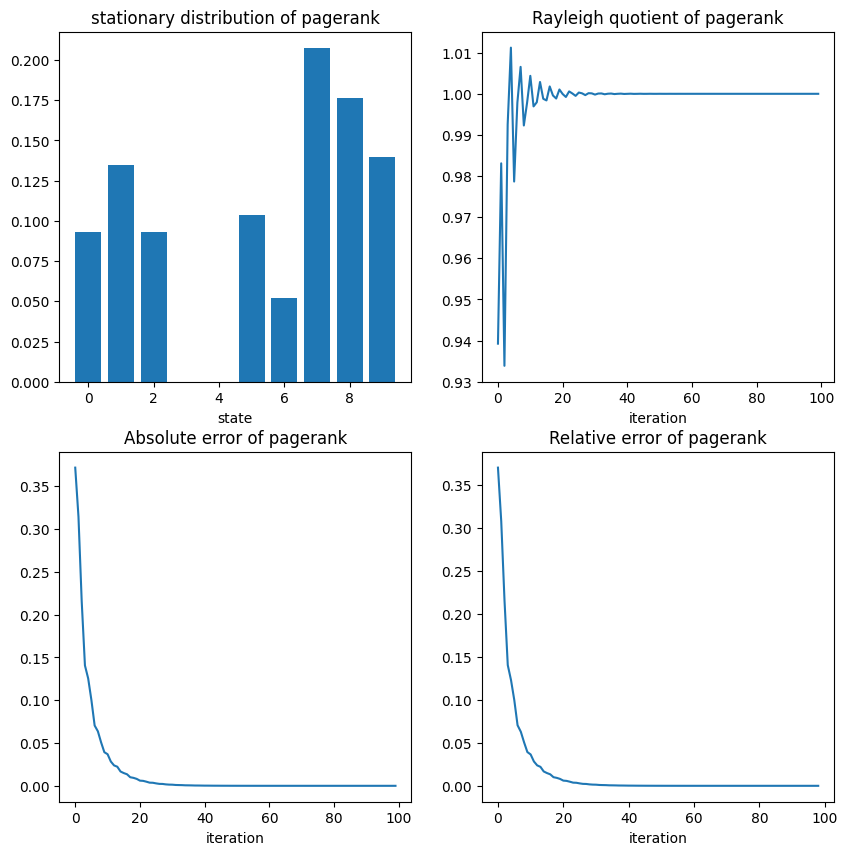

In [14]:
#create a subplot

fig,ax=plt.subplots(2,2,figsize=(10,10))

#bar plot of the stationary distribution of pagerank

ax[0,0].bar(np.arange(10),rs_vec)
ax[0,0].set_title('stationary distribution of pagerank')
ax[0,0].set_xlabel('state')


ax[0,1].plot(raleigh_quotient)
ax[0,1].set_title('Rayleigh quotient of pagerank')
ax[0,1].set_xlabel('iteration')

ax[1,0].plot(err_vec)
ax[1,0].set_title('Absolute error of pagerank')
ax[1,0].set_xlabel('iteration')

ax[1,1].plot(rel_err_vec[1:])
ax[1,1].set_title('Relative error of pagerank')
ax[1,1].set_xlabel('iteration')

plt.show()


stationary distribution of pagerank: 

node  0 :  0.09326425007127083
node  1 :  0.13471502564750484
node  2 :  0.09326424761241968
node  3 :  0.0
node  4 :  0.0
node  5 :  0.10362694431262788
node  6 :  0.051813471456905645
node  7 :  0.20725388416323814
node  8 :  0.17616580402479678
node  9 :  0.13989637271123617


maximum value of the stationary distribution of pagerank:  0.20725388416323814
node with maximum value of the stationary distribution of pagerank:  7


minimum value of the stationary distribution of pagerank:  0.0
nodes with minimum value of the stationary distribution of pagerank:  3 4 

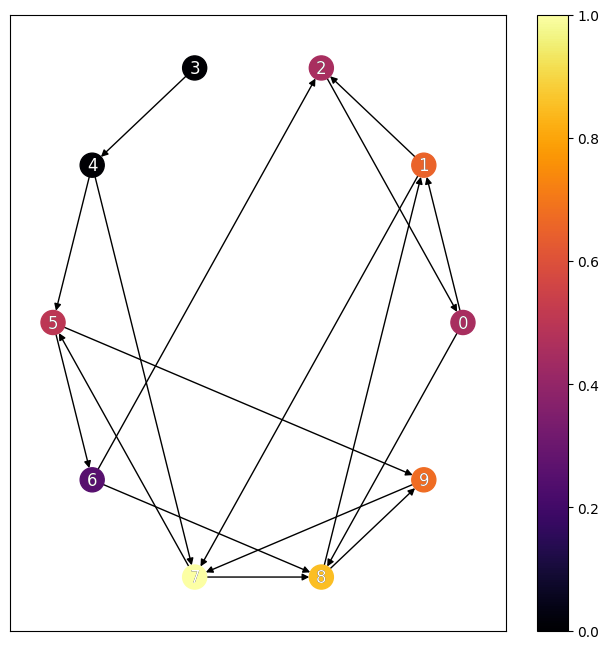

In [15]:
import networkx as nx

G=nx.DiGraph()


#add nodes using transition matrix

G.add_nodes_from(np.arange(10))

#add edges using transition matrix

for i in range(10):
    for j in range(10):
        if transition_matrix[i,j]>0:
            G.add_edge(j,i)

#draw the graph and highlight the stationary distribution of pagerank

fig,ax=plt.subplots(figsize=(8,8))


#the plot is not correct. the nodes are not in the correct position.

nx.draw_networkx(G,pos=nx.circular_layout(G),node_color=rs_vec,with_labels=True,ax=ax,cmap='inferno')

#adjust the font colour according to the colour of the node

for node in G.nodes:
    if rs_vec[node]<0.5:
        nx.draw_networkx_labels(G,pos=nx.circular_layout(G),labels={node:node},font_color='w',ax=ax)

#also include the colour bar

sm=plt.cm.ScalarMappable(cmap='inferno',norm=plt.Normalize(vmin=0,vmax=1))

sm._A=[]

fig.colorbar(sm,ax=ax)

#print the res_vec and the node labels

#print res_vec in a better format

print("stationary distribution of pagerank: \n")

for i in range(10):
    print("node ",i,": ",rs_vec[i])

#print the maximum and minimum values of the stationary distribution of pagerank amd the corresponding nodes

print("\n")

print("maximum value of the stationary distribution of pagerank: ",np.max(rs_vec))
print("node with maximum value of the stationary distribution of pagerank: ",np.argmax(rs_vec))

print("\n")

print("minimum value of the stationary distribution of pagerank: ",np.min(rs_vec))

#print all the nodes with the minimum value of the stationary distribution of pagerank

print("nodes with minimum value of the stationary distribution of pagerank: ",end=" ")

for i in range(10):
    if rs_vec[i]==np.min(rs_vec):
        print(i,end=" ")
plt.show()